In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

In [3]:
font_path = 'C:/Windows/Fonts/KoPubBatangMedium.ttf'
fontprop = fm.FontProperties(fname = font_path)

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "gray",
    "grid.linestyle": "dashed",
    'grid.linewidth': '0.5',
    "axes.labelcolor": "#000000",
    "font.family":fontprop.get_name(),
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rc('axes', unicode_minus = 'False')
sns.set(rc=rc)

# 선형대수학적 관점에서 보는 회귀 분석 

In [4]:
A = np.array([[1,1,1],[1,2,3]]).T
b = np.array([-3,-5,8])

print('A matrix')
print(A)
print('b')
print(b)

A matrix
[[1 1]
 [1 2]
 [1 3]]
b
[-3 -5  8]


### Ax = b 의 해가 없을 때 가장 b 의 값과 유사한 값을 만드는 x 의 해는 무엇일까 ? 

Text(-8, -5, 'B 벡터는 A의 열공간에 \n 위치 하는가 ? ')

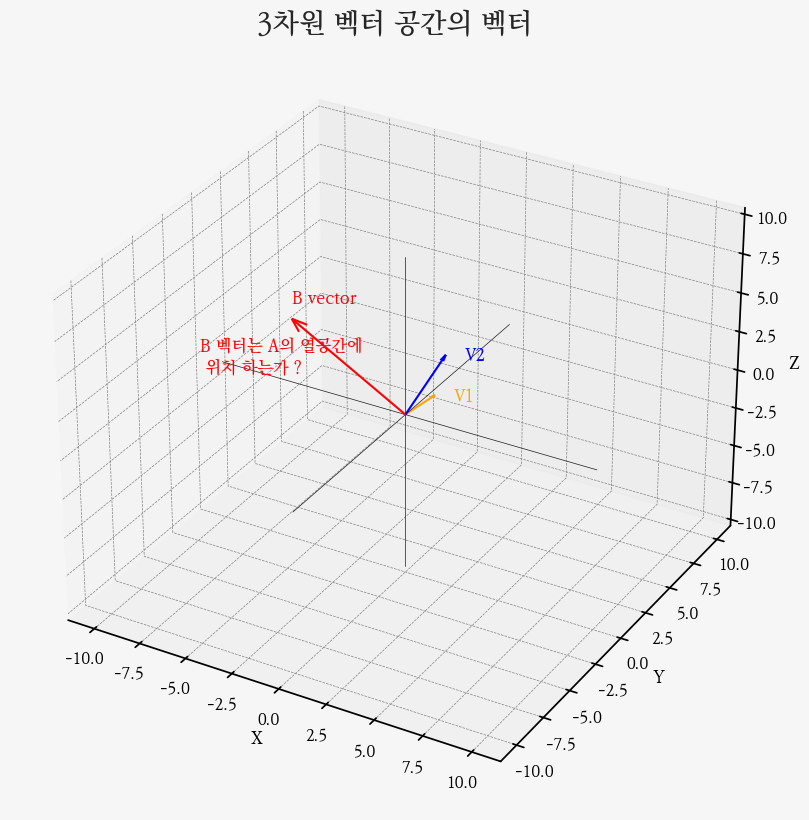

In [5]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

ax.plot([-10,0,10],[0,0,0],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[-10,0,10],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[0,0,0],[-10,0,10], c = 'k', lw = 0.5)

colors = ['orange','blue','green']

for i in range(2):
    vector = A[:,i]
    ax.quiver(0,0,0,vector[0],vector[1],vector[2], color = colors[i],arrow_length_ratio = 0.1)
    ax.text(vector[0]+1,vector[1],vector[2],f'V{i+1}', c = colors[i])
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('3차원 벡터 공간의 벡터', fontsize = 20)

ax.quiver(0,0,0,b[0],b[1],b[2], arrow_length_ratio = 0.1, color = 'red')
ax.text(b[0],b[1],b[2] + 1, 'B vector', color = 'red')

ax.text(b[0] - 5, b[1] , b[2] -5, 'B 벡터는 A의 열공간에 \n 위치 하는가 ? ', color = 'red')


* Ax = b 의 해를 찾는다는 것은 A 의 열공간에 b 벡터가 존재하는가를 물어보는 것이다.
    * 즉 A 의 벡터들의 선형 결합으로 b 벡터를 형성할 수 있는가 

Text(0.5, 0.92, 'A 의 열공간과 B 벡터 \n B 벡터는 A의 열공간에 위치하지 않는다')

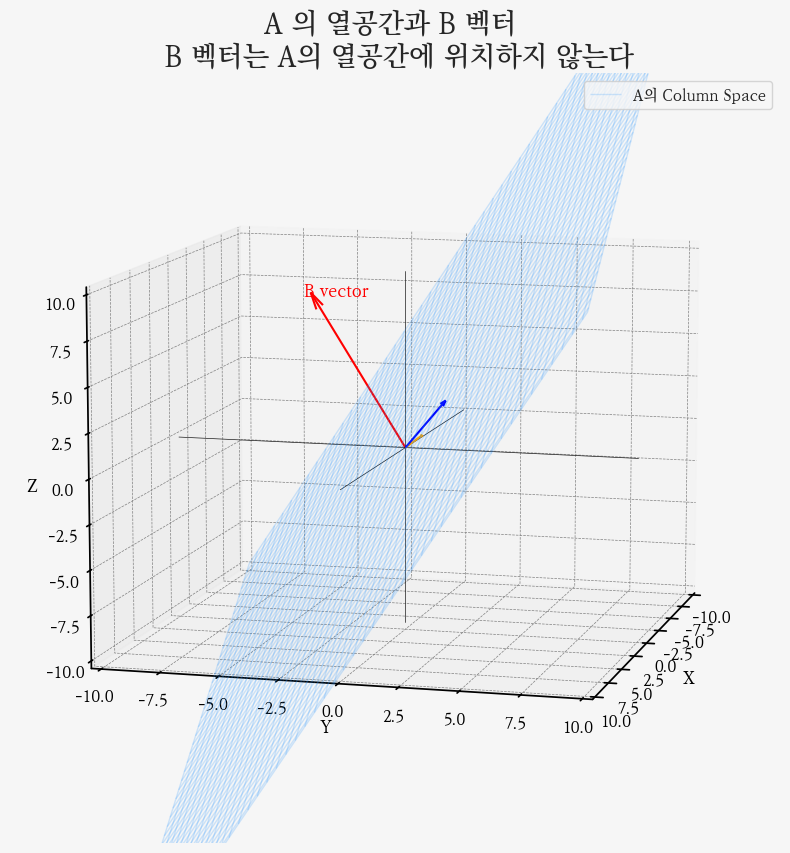

In [6]:
v1,v2 = A[:,0],A[:,1]
normal = np.cross(v1, v2)
# Generate points on the plane
d = 0  # Distance of the plane from the origin
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = (-normal[0] * X - normal[1] * Y + d) / normal[2]



fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])

ax.plot([-10,0,10],[0,0,0],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[-10,0,10],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[0,0,0],[-10,0,10], c = 'k', lw = 0.5)

colors = ['orange','blue']

for i in range(2):
    vector = A[:,i]
    ax.quiver(0,0,0,vector[0],vector[1],vector[2], color = colors[i],arrow_length_ratio = 0.1)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.quiver(0,0,0,b[0],b[1],b[2], arrow_length_ratio = 0.1, color = 'red')
ax.text(b[0] + 1,b[1],b[2], 'B vector', color = 'red')

ax.plot_wireframe(X, Y, Z, label = 'A의 Column Space',
                    color = 'dodgerblue', alpha = 0.2, lw = 1)
ax.legend()

ax.view_init(10,15)

ax.set_title('A 의 열공간과 B 벡터 \n B 벡터는 A의 열공간에 위치하지 않는다', fontsize = 20)

### 하지만 A의 열벡터들이 이루는 열공간에 B 벡터는 존재하지 않는다 
* 즉 Ax = b 의 해가 존재하지 않는다 

Text(0.5, 0.92, 'A 의 선형 결합으로 만들 수 있는 벡터 중\n 어떤 벡터가 가장 B 벡터와 유사할까 ?')

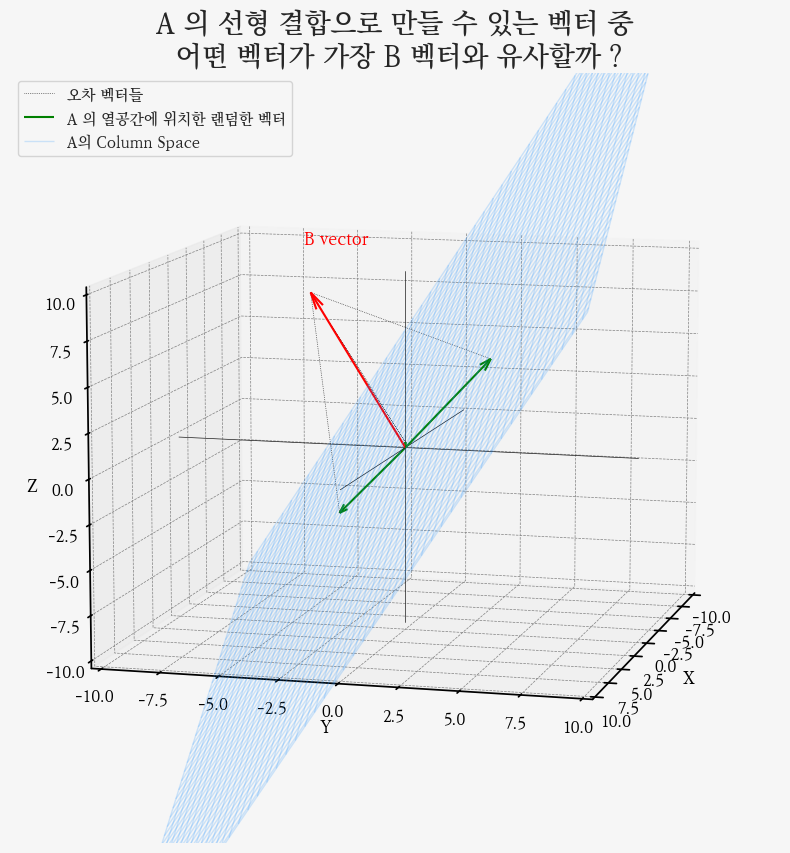

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])

ax.plot([-10,0,10],[0,0,0],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[-10,0,10],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[0,0,0],[-10,0,10], c = 'k', lw = 0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for _ in range(3):
    
    num_1 = np.random.uniform(-5,5)
    num_2 = np.random.uniform(-3,3)
    
    r_v = v1 * num_1 + v2 * num_2
    
    ax.quiver(0,0,0,r_v[0],r_v[1],r_v[2], arrow_length_ratio = 0.1, color = 'green')
    
    ax.plot([r_v[0],b[0]],[r_v[1],b[1]],[r_v[2],b[2]], c = 'k', lw = 0.5, ls = ':')
    
ax.plot([r_v[0],b[0]],[r_v[1],b[1]],[r_v[2],b[2]], c = 'k', lw = 0.5, ls = ':', label = '오차 벡터들')

ax.quiver(0,0,0,r_v[0],r_v[1],r_v[2], arrow_length_ratio = 0.1,color = 'green',
            label = 'A 의 열공간에 위치한 랜덤한 벡터')


ax.quiver(0,0,0,b[0],b[1],b[2], arrow_length_ratio = 0.1, color = 'red')
ax.text(b[0] + 1,b[1],b[2] + 3, 'B vector', color = 'red')

ax.plot_wireframe(X, Y, Z, label = 'A의 Column Space',
                    color = 'dodgerblue', alpha = 0.2, lw = 1)
ax.legend(loc = 'upper left')

ax.view_init(10,15)

ax.set_title('A 의 선형 결합으로 만들 수 있는 벡터 중\n 어떤 벡터가 가장 B 벡터와 유사할까 ?',
                fontsize = 20)


* 꿩 대신 닭이라고 A의 선형결합으로 만든 벡터 P를 만들자 
    * 이 때 P는 벡터 b와 가장 유사한 값을 가지는 벡터이다.

    * 가장 벡터 b 의 정보를 가지는 벡터 p는 어떤 것일까 ? 

Text(0.5, 0.92, '벡터 B 를 A 의 column space 위에 정사영')

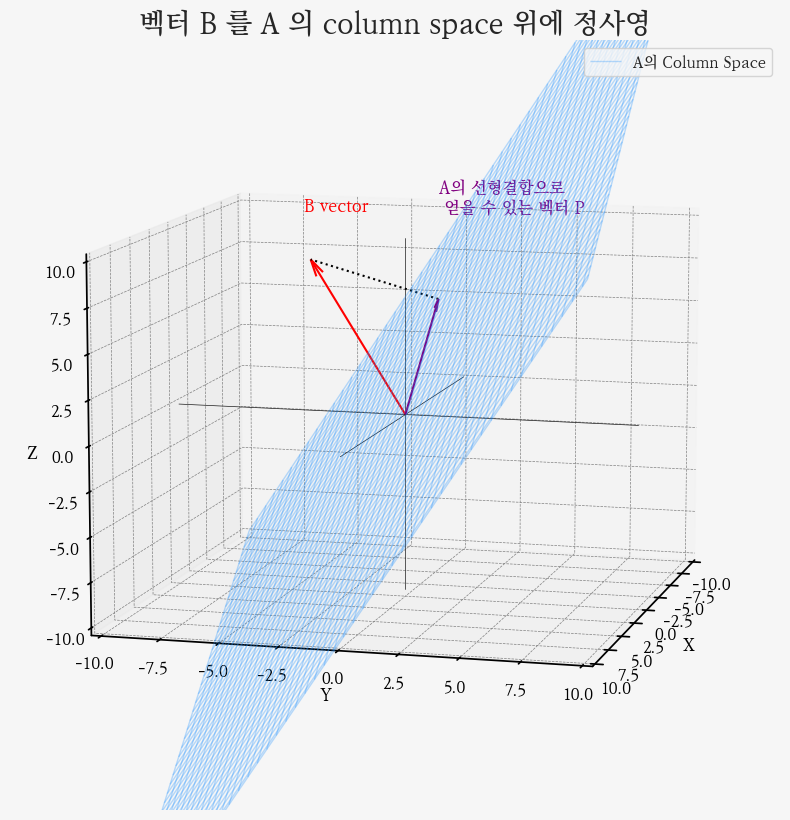

In [8]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])

ax.plot([-10,0,10],[0,0,0],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[-10,0,10],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[0,0,0],[-10,0,10], c = 'k', lw = 0.5)

# 최소제곱법으로 구한 X
x_hat = np.linalg.lstsq(A, b, rcond=None)[0]

p = A @ x_hat

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.quiver(0,0,0,b[0],b[1],b[2], arrow_length_ratio = 0.1, color = 'red')
ax.quiver(0,0,0,p[0],p[1],p[2], arrow_length_ratio = 0.1, color = 'purple')

ax.text(p[0],p[1],p[2] + 5, 'A의 선형결합으로 \n 얻을 수 있는 벡터 P', c = 'purple')
ax.text(b[0] + 1,b[1],b[2] + 3, 'B vector', color = 'red')

ax.plot([p[0], b[0]], [p[1], b[1]], [p[2], b[2]], linestyle='dotted', color='black')

ax.plot_wireframe(X, Y, Z, label = 'A의 Column Space',
                    color = 'dodgerblue', alpha = 0.3, lw = 1)

ax.legend()

ax.view_init(10,15)

ax.set_title('벡터 B 를 A 의 column space 위에 정사영',
                fontsize = 20)

Text(0.5, 0.92, '오차벡터와 열 공간의 관계')

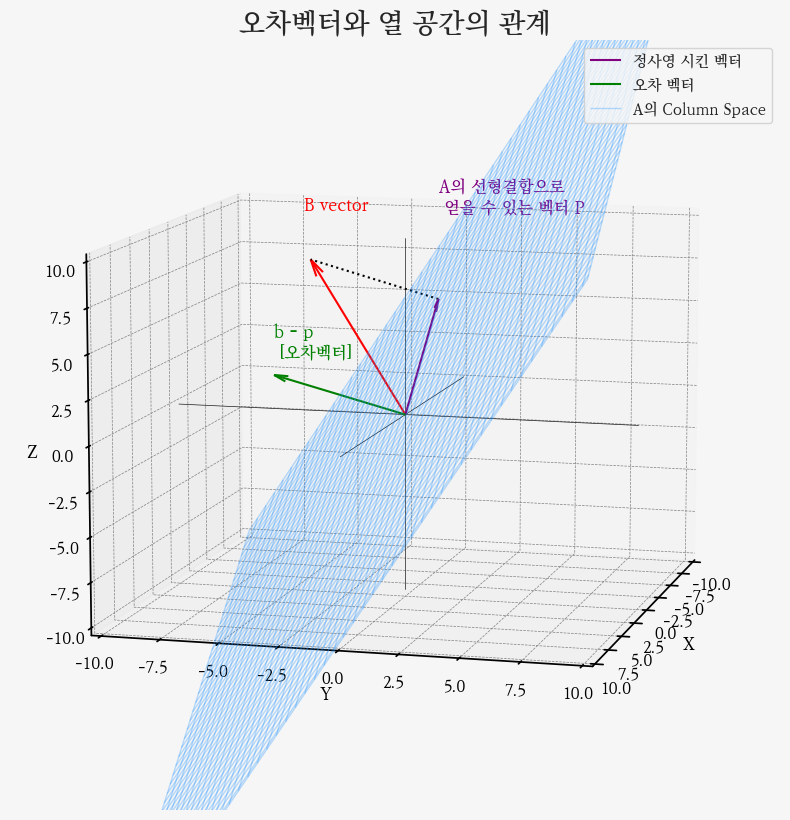

In [22]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')


ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])

ax.plot([-10,0,10],[0,0,0],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[-10,0,10],[0,0,0], c = 'k', lw = 0.5)
ax.plot([0,0,0],[0,0,0],[-10,0,10], c = 'k', lw = 0.5)

# 최소제곱법으로 구한 X
x_hat = np.linalg.lstsq(A, b, rcond=None)[0]

p = A @ x_hat
e = b - p

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.quiver(0,0,0,b[0],b[1],b[2], arrow_length_ratio = 0.1, color = 'red')
ax.quiver(0,0,0,p[0],p[1],p[2], arrow_length_ratio = 0.1, color = 'purple', label = '정사영 시킨 벡터')
ax.text(p[0],p[1],p[2] + 5, 'A의 선형결합으로 \n 얻을 수 있는 벡터 P', c = 'purple')
ax.text(b[0] + 1,b[1],b[2] + 3, 'B vector', color = 'red')

ax.quiver(0,0,0,e[0],e[1],e[2], label = '오차 벡터', arrow_length_ratio = 0.1, color = 'green')
ax.text(e[0],e[1],e[2] + 1,'b - p \n [오차벡터]',color = 'green')


ax.plot([p[0], b[0]], [p[1], b[1]], [p[2], b[2]], linestyle='dotted', color='black')
ax.plot_wireframe(X, Y, Z, label = 'A의 Column Space',
                    color = 'dodgerblue', alpha = 0.3, lw = 1)
ax.legend()

ax.view_init(10,15)

ax.set_title('오차벡터와 열 공간의 관계',
                fontsize = 20)
